**Instructions:** Explore and try to implement the CAP curve and ROC curve in Python
using the classification models that we have discussed and using some dataset from the UCI machine learning repository.

# Import the necessities

In [2]:
#Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [57]:
#Import the machine learning libraries
from sklearn.metrics import roc_curve, auc, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline

In [17]:
#Import the dataset
dataset = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt', 
                      header = None)
dataset.head()

,0,1,2,3,4
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [5]:
dataset.shape

(100, 10)

In [18]:
#add column names
dataset.columns = ['variance', 'skewness', 'curtosis', 'entropy', 'class']
dataset.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [7]:
#split into features and target values
X = dataset.drop('diagnosis', axis = 1)
y = dataset['diagnosis'].values

In [19]:
#split into features and target values
X = dataset.drop('class', axis = 1)
y = dataset['class'].values

In [20]:
#print the X values
X.head()

,variance,skewness,curtosis,entropy
0,3.62160,8.6661,-2.8073,-0.44699
1,4.54590,8.1674,-2.4586,-1.46210
2,3.86600,-2.6383,1.9242,0.10645
3,3.45660,9.5228,-4.0112,-3.59440
4,0.32924,-4.4552,4.5718,-0.98880


In [21]:
#print the y values
print(y)

[0 0 0 ... 1 1 1]


# Feature Scaling

In [23]:
sc = StandardScaler()
X_sc = sc.fit_transform(X, y)

#display the standardized columns
X_sc = pd.DataFrame(X_sc, columns = X.columns)
X_sc.head()

,variance,skewness,curtosis,entropy
0,1.121806,1.149455,-0.975970,0.354561
1,1.447066,1.064453,-0.895036,-0.128767
2,1.207810,-0.777352,0.122218,0.618073
3,1.063742,1.295478,-1.255397,-1.144029
4,-0.036772,-1.087038,0.736730,0.096587


# Split the dataset

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 5, stratify = y)

# Logistic Regression

In [65]:
#instantiate
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

#predict
logreg_pred = logreg.predict(X_test)

#evaluate
print(confusion_matrix(y_test, logreg_pred))
print("{0:.5}".format(accuracy_score(y_test, logreg_pred)))

[[152   1]
 [  0 122]]
0.99636


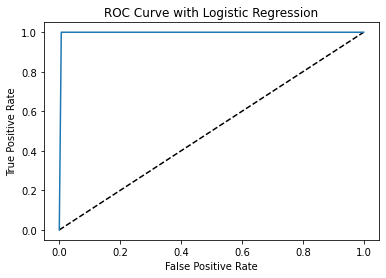

In [71]:
#roc
fpr, tpr, threshold = roc_curve(y_test, logreg_pred)
roc_auc = auc(fpr, tpr)

#visualization
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with Logistic Regression')
plt.show()

In [67]:
#cap
#count the numbers for each class
total = len(y_test)
class_1_count = np.sum(y_test)
class_2_count = total - class_1_count

In [81]:
#calculate probability of results
logreg_probs = logreg.predict_proba(X_test)
logreg_probs = logreg_probs[:,1]
model_y = [y for _, y in sorted(zip(logreg_probs, y_test), reverse = True)]
y_values = np.append([0], np.cumsum(model_y))
x_values = np.arange(0, total + 1)

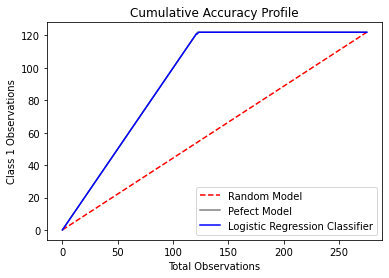

In [80]:
#visualization for cap
#random model
plt.plot([0, total], 
         [0, class_1_count], 
         c = 'r', 
         linestyle = '--', 
         label = 'Random Model')

#perfect model
plt.plot([0, class_1_count, total],
        [0, class_1_count, class_1_count],
        c = 'grey',
        label = 'Pefect Model')

#linear regression model
plt.plot(x_values, 
         y_values,
        c = 'b', 
        label = 'Logistic Regression Classifier')

#design
plt.xlabel('Total Observations')
plt.ylabel('Class 1 Observations')
plt.title('Cumulative Accuracy Profile')
plt.legend(loc = 'lower right')
plt.show()

# Knn

In [55]:
#instantiate
knn = KNeighborsClassifier(n_neighbors = 15)
knn.fit(X_train, y_train)

#predict
knn_pred = knn.predict(X_test)

#evaluate
print(confusion_matrix(y_test, knn_pred))
print("{0:.5}".format(accuracy_score(y_test, knn_pred)))

[[151   2]
 [  0 122]]
0.99273


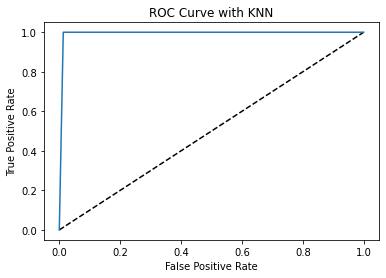

In [56]:
#roc
fpr, tpr, threshold = roc_curve(y_test, knn_pred)
roc_auc = auc(fpr, tpr)

#visualization
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with KNN')
plt.show()

In [82]:
#use the count from logistic regression
#calculate probability of results
knn_probs = knn.predict_proba(X_test)
knn_probs = knn_probs[:,1]
model_y = [y for _, y in sorted(zip(knn_probs, y_test), reverse = True)]
y_values = np.append([0], np.cumsum(model_y))
x_values = np.arange(0, total + 1)

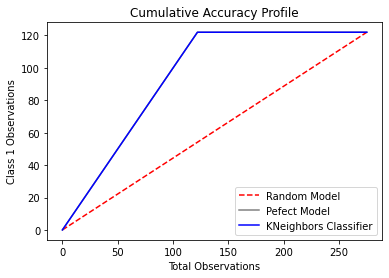

In [83]:
#visualization for cap
#random model
plt.plot([0, total], 
         [0, class_1_count], 
         c = 'r', 
         linestyle = '--', 
         label = 'Random Model')

#perfect model
plt.plot([0, class_1_count, total],
        [0, class_1_count, class_1_count],
        c = 'grey',
        label = 'Pefect Model')

#linear regression model
plt.plot(x_values, 
         y_values,
        c = 'b', 
        label = 'KNeighbors Classifier')

#design
plt.xlabel('Total Observations')
plt.ylabel('Class 1 Observations')
plt.title('Cumulative Accuracy Profile')
plt.legend(loc = 'lower right')
plt.show()

# Support Vector Machines

In [85]:
#instantiate
vector = SVC(kernel = 'linear', random_state = 0)
vector.fit(X_train, y_train)

#predict
vector_pred = vector.predict(X_test)

#evaluate
print(confusion_matrix(y_test, vector_pred))
print("{0:.5}".format(accuracy_score(y_test, vector_pred)))

[[152   1]
 [  0 122]]
0.99636


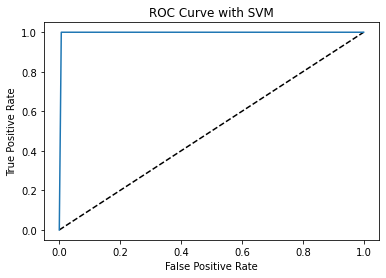

In [87]:
#roc
fpr, tpr, threshold = roc_curve(y_test, vector_pred)
roc_auc = auc(fpr, tpr)

#visualization
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with SVM')
plt.show()

In [88]:
#use the count from logistic regression
#calculate probability of results
vector_probs = knn.predict_proba(X_test)
vector_probs = vector_probs[:,1]
model_y = [y for _, y in sorted(zip(vector_probs, y_test), reverse = True)]
y_values = np.append([0], np.cumsum(model_y))
x_values = np.arange(0, total + 1)

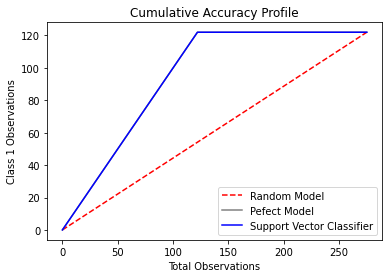

In [89]:
#visualization for cap
#random model
plt.plot([0, total], 
         [0, class_1_count], 
         c = 'r', 
         linestyle = '--', 
         label = 'Random Model')

#perfect model
plt.plot([0, class_1_count, total],
        [0, class_1_count, class_1_count],
        c = 'grey',
        label = 'Pefect Model')

#linear regression model
plt.plot(x_values, 
         y_values,
        c = 'b', 
        label = 'Support Vector Classifier')

#design
plt.xlabel('Total Observations')
plt.ylabel('Class 1 Observations')
plt.title('Cumulative Accuracy Profile')
plt.legend(loc = 'lower right')
plt.show()